In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles
import csv

# Reading the updated datasets again
AAW_updated = pd.read_csv('F:\YinYang\BIA utbildning\Kurs 5 Design och Visualisering\Vecka 7\AAW.csv')
COLI_updated = pd.read_csv('F:\YinYang\BIA utbildning\Kurs 5 Design och Visualisering\Vecka 7\COLI.csv')
DSS_updated = pd.read_csv('F:\YinYang\BIA utbildning\Kurs 5 Design och Visualisering\Vecka 7\DSS.csv')
QOLI_updated = pd.read_csv('F:\YinYang\BIA utbildning\Kurs 5 Design och Visualisering\Vecka 7\QOLI.csv')
TOS_updated = pd.read_csv('F:\YinYang\BIA utbildning\Kurs 5 Design och Visualisering\Vecka 7\TOS.csv')

# Checking if 'Country_ISO' exists in all datasets
columns_AAW_updated = AAW_updated.columns.tolist()
columns_COLI_updated = COLI_updated.columns.tolist()
columns_DSS_updated = DSS_updated.columns.tolist()
columns_QOLI_updated = QOLI_updated.columns.tolist()
columns_TOS_updated = TOS_updated.columns.tolist()

# List the columns that have 'Country_ISO'
datasets_with_country_iso = {
    'AAW': 'Country_ISO' in columns_AAW_updated,
    'COLI': 'Country_ISO' in columns_COLI_updated,
    'DSS': 'Country_ISO' in columns_DSS_updated,
    'QOLI': 'Country_ISO' in columns_QOLI_updated,
    'TOS': 'Country_ISO' in columns_TOS_updated
}

datasets_with_country_iso


{'AAW': True, 'COLI': True, 'DSS': True, 'QOLI': True, 'TOS': True}

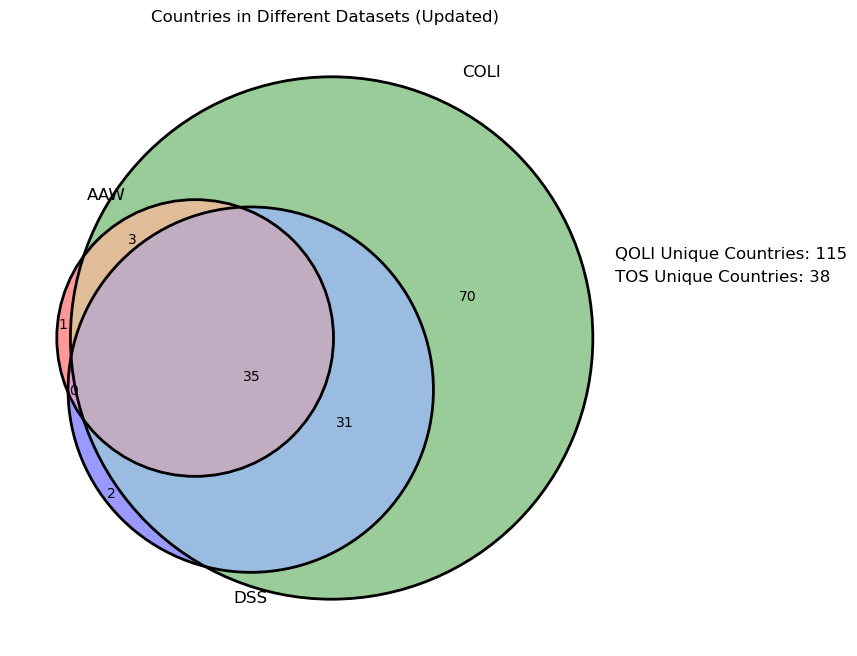

In [14]:
# Extracting the unique countries using 'Country_ISO' from each updated dataset
countries_AAW_updated = set(AAW_updated['Country_ISO'].unique())
countries_COLI_updated = set(COLI_updated['Country_ISO'].unique())
countries_DSS_updated = set(DSS_updated['Country_ISO'].unique())
countries_QOLI_updated = set(QOLI_updated['Country_ISO'].unique())
countries_TOS_updated = set(TOS_updated['Country_ISO'].unique())

# Creating the Venn diagram for three datasets; for the sake of clarity, we choose AAW, COLI, and DSS
plt.figure(figsize=(10, 8))
venn = venn3([countries_AAW_updated, countries_COLI_updated, countries_DSS_updated], 
             set_labels=('AAW', 'COLI', 'DSS'))
venn_circles = venn3_circles([countries_AAW_updated, countries_COLI_updated, countries_DSS_updated])

# Adding the information for QOLI and TOS as text annotations
plt.annotate(f"QOLI Unique Countries: {len(countries_QOLI_updated)}", (0.7, 0.2), fontsize=12)
plt.annotate(f"TOS Unique Countries: {len(countries_TOS_updated)}", (0.7, 0.15), fontsize=12)

plt.title("Countries in Different Datasets (Updated)")
plt.show()


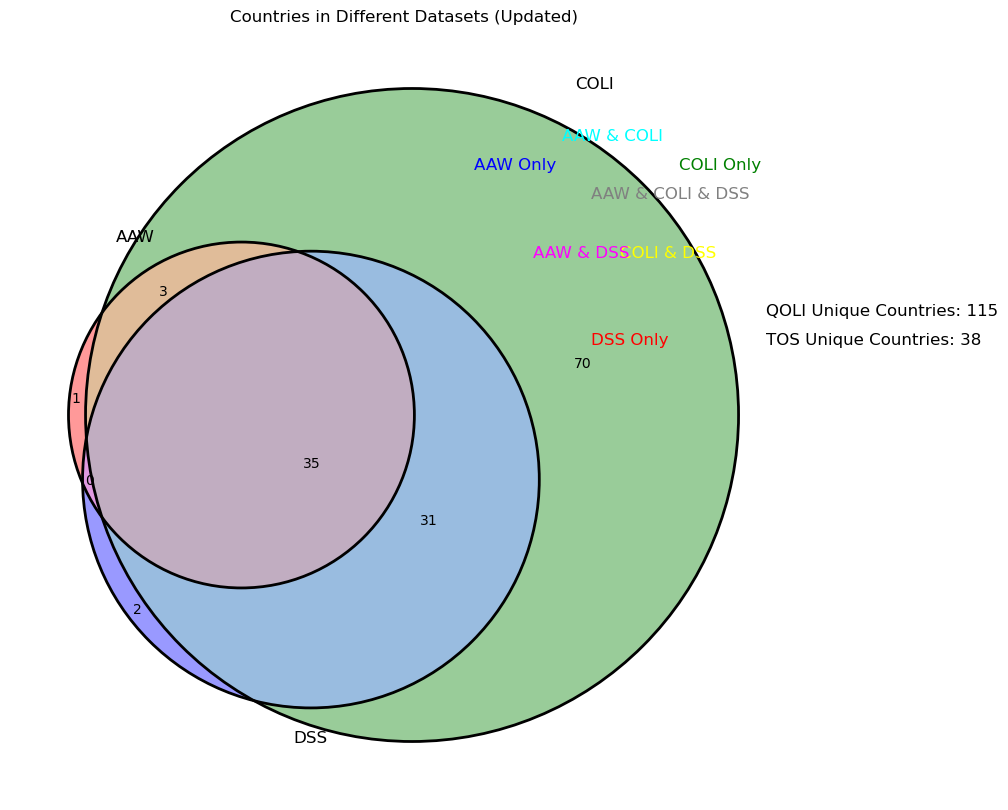

In [15]:
# Creating the Venn diagram with annotations for color-coded regions
plt.figure(figsize=(12, 10))
venn = venn3([countries_AAW_updated, countries_COLI_updated, countries_DSS_updated], 
             set_labels=('AAW', 'COLI', 'DSS'))
venn_circles = venn3_circles([countries_AAW_updated, countries_COLI_updated, countries_DSS_updated])

# Adding color explanation as text annotations
plt.annotate("AAW Only", (0.2, 0.45), fontsize=12, color='blue')
plt.annotate("COLI Only", (0.55, 0.45), fontsize=12, color='green')
plt.annotate("DSS Only", (0.4, 0.15), fontsize=12, color='red')
plt.annotate("AAW & COLI", (0.35, 0.5), fontsize=12, color='cyan')
plt.annotate("COLI & DSS", (0.45, 0.3), fontsize=12, color='yellow')
plt.annotate("AAW & DSS", (0.3, 0.3), fontsize=12, color='magenta')
plt.annotate("AAW & COLI & DSS", (0.4, 0.4), fontsize=12, color='grey')

# Adding the information for QOLI and TOS as text annotations
plt.annotate(f"QOLI Unique Countries: {len(countries_QOLI_updated)}", (0.7, 0.2), fontsize=12)
plt.annotate(f"TOS Unique Countries: {len(countries_TOS_updated)}", (0.7, 0.15), fontsize=12)

plt.title("Countries in Different Datasets (Updated)")
plt.show()


In [17]:
# Calculating the total number of unique 'Country_ISO' in each dataset
total_AAW = len(countries_AAW_updated)
total_COLI = len(countries_COLI_updated)
total_DSS = len(countries_DSS_updated)
total_QOLI = len(countries_QOLI_updated)
total_TOS = len(countries_TOS_updated)

# Calculating the number of unique 'Country_ISO' in each intersection
intersect_AAW_COLI = len(countries_AAW_updated.intersection(countries_COLI_updated))
intersect_AAW_DSS = len(countries_AAW_updated.intersection(countries_DSS_updated))
intersect_COLI_DSS = len(countries_COLI_updated.intersection(countries_DSS_updated))
intersect_AAW_COLI_DSS = len(countries_AAW_updated.intersection(countries_COLI_updated, countries_DSS_updated))

total_AAW, total_COLI, total_DSS, total_QOLI, total_TOS, intersect_AAW_COLI, intersect_AAW_DSS, intersect_COLI_DSS, intersect_AAW_COLI_DSS


(39, 139, 68, 115, 38, 38, 35, 66, 35)

In [18]:
# Calculating the five-way intersection among all datasets
intersect_five_way = len(countries_AAW_updated.intersection(countries_COLI_updated, countries_DSS_updated, countries_QOLI_updated, countries_TOS_updated))
intersect_five_way


34

In [19]:
# Calculating the total number of unique 'Country_ISO' in each dataset again, including QOLI and TOS for completeness
total_counts = {
    'AAW': total_AAW,
    'COLI': total_COLI,
    'DSS': total_DSS,
    'QOLI': total_QOLI,
    'TOS': total_TOS
}

# Calculating all possible overlaps (intersections) among the datasets
intersection_counts = {
    'AAW & COLI': intersect_AAW_COLI,
    'AAW & DSS': intersect_AAW_DSS,
    'AAW & QOLI': len(countries_AAW_updated.intersection(countries_QOLI_updated)),
    'AAW & TOS': len(countries_AAW_updated.intersection(countries_TOS_updated)),
    'COLI & DSS': intersect_COLI_DSS,
    'COLI & QOLI': len(countries_COLI_updated.intersection(countries_QOLI_updated)),
    'COLI & TOS': len(countries_COLI_updated.intersection(countries_TOS_updated)),
    'DSS & QOLI': len(countries_DSS_updated.intersection(countries_QOLI_updated)),
    'DSS & TOS': len(countries_DSS_updated.intersection(countries_TOS_updated)),
    'QOLI & TOS': len(countries_QOLI_updated.intersection(countries_TOS_updated)),
    'AAW & COLI & DSS': intersect_AAW_COLI_DSS,
    'AAW & COLI & QOLI': len(countries_AAW_updated.intersection(countries_COLI_updated, countries_QOLI_updated)),
    'AAW & COLI & TOS': len(countries_AAW_updated.intersection(countries_COLI_updated, countries_TOS_updated)),
    'AAW & DSS & QOLI': len(countries_AAW_updated.intersection(countries_DSS_updated, countries_QOLI_updated)),
    'AAW & DSS & TOS': len(countries_AAW_updated.intersection(countries_DSS_updated, countries_TOS_updated)),
    'COLI & DSS & QOLI': len(countries_COLI_updated.intersection(countries_DSS_updated, countries_QOLI_updated)),
    'COLI & DSS & TOS': len(countries_COLI_updated.intersection(countries_DSS_updated, countries_TOS_updated)),
    'AAW & COLI & DSS & QOLI': len(countries_AAW_updated.intersection(countries_COLI_updated, countries_DSS_updated, countries_QOLI_updated)),
    'AAW & COLI & DSS & TOS': len(countries_AAW_updated.intersection(countries_COLI_updated, countries_DSS_updated, countries_TOS_updated)),
    'Five-way overlap': intersect_five_way
}

total_counts, intersection_counts


({'AAW': 39, 'COLI': 139, 'DSS': 68, 'QOLI': 115, 'TOS': 38},
 {'AAW & COLI': 38,
  'AAW & DSS': 35,
  'AAW & QOLI': 37,
  'AAW & TOS': 38,
  'COLI & DSS': 66,
  'COLI & QOLI': 114,
  'COLI & TOS': 38,
  'DSS & QOLI': 62,
  'DSS & TOS': 35,
  'QOLI & TOS': 37,
  'AAW & COLI & DSS': 35,
  'AAW & COLI & QOLI': 37,
  'AAW & COLI & TOS': 38,
  'AAW & DSS & QOLI': 34,
  'AAW & DSS & TOS': 35,
  'COLI & DSS & QOLI': 62,
  'COLI & DSS & TOS': 35,
  'AAW & COLI & DSS & QOLI': 34,
  'AAW & COLI & DSS & TOS': 35,
  'Five-way overlap': 34})